# **MERGING WIND SPEED DATA INTO SHAPEFILE Using Programming**

**Name:** Arjun Adhikari
          
**Date:** 17th June, 2024. 

Third year Civil Engineering Student at Pulchowk Campus

I downloaded the zip file , extracted and completed the task-1 using QGIS (join). The screen shot and detail process is in word file. Then I further wanted to solve using programming so,
I opened Jupyter Notebook to begin working with the files programmatically.
In the process, I loaded both the shapefile and the CSV file into Python using GeoPandas and Pandas, respectively. Upon inspecting the data, I realized that I needed to rename the river column in the CSV file in order to properly merge the wind speed data.

The solution is demonstrated below:


Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

Pandas is used to read the CSV file

In [2]:
data_ws = pd.read_excel("Wind Speed for Stations.xlsx") # Read the excelfile

In [3]:
data_ws

,ID,River,Wind speed
0,1,72486218,1.25
1,2,5937983,-2.51
2,3,98560000,17.93
3,4,18582085,13.93
4,5,32475719,39.45
...,...,...,...
2031,2032,59829471,30.28
2032,2033,86269186,19.18
2033,2034,62862619,11.35
2034,2035,22292625,-0.18


Geopandas is used to read the shapefile which contains the geographical information of the stations

In [4]:
data_obs = gpd.read_file("Observation Points.shp") # Read the shapefile

In [5]:
data_obs

,id,COMID,geometry
0,0,4355802,POINT (82.51877 28.79328)
1,1,17987699,POINT (82.79122 29.21023)
2,2,58444839,POINT (82.30871 28.64474)
3,3,74579745,POINT (82.25333 28.40453)
4,4,14003165,POINT (82.19818 29.54809)
...,...,...,...
1740,1740,13694658,POINT (82.23983 28.29809)
1741,1741,92391740,POINT (81.49643 28.59992)
1742,1742,69821504,POINT (83.06944 28.63607)
1743,1743,95383613,POINT (87.22836 26.40730)


In [6]:
data_ws.rename(columns={'River': 'COMID'}, inplace=True) # Rename 'River' column to 'COMID'

In [7]:
data_ws

,ID,COMID,Wind speed
0,1,72486218,1.25
1,2,5937983,-2.51
2,3,98560000,17.93
3,4,18582085,13.93
4,5,32475719,39.45
...,...,...,...
2031,2032,59829471,30.28
2032,2033,86269186,19.18
2033,2034,62862619,11.35
2034,2035,22292625,-0.18


In [8]:
merged_obs = data_obs.merge(data_ws, on ='COMID')

In [9]:
merged_obs

,id,COMID,geometry,ID,Wind speed
0,0,4355802,POINT (82.51877 28.79328),1772,6.55
1,1,17987699,POINT (82.79122 29.21023),1158,26.12
2,2,58444839,POINT (82.30871 28.64474),863,2.15
3,3,74579745,POINT (82.25333 28.40453),1380,24.53
4,4,14003165,POINT (82.19818 29.54809),1502,6.89
...,...,...,...,...,...
1740,1740,13694658,POINT (82.23983 28.29809),1340,39.91
1741,1741,92391740,POINT (81.49643 28.59992),1594,0.27
1742,1742,69821504,POINT (83.06944 28.63607),1802,2.84
1743,1743,95383613,POINT (87.22836 26.40730),1628,25.57


In [10]:
merged_obs.drop(columns=['ID'],inplace=True) #dropping the unnecessary column

In [12]:
merged_obs

,id,COMID,geometry,Wind speed
0,0,4355802,POINT (82.51877 28.79328),6.55
1,1,17987699,POINT (82.79122 29.21023),26.12
2,2,58444839,POINT (82.30871 28.64474),2.15
3,3,74579745,POINT (82.25333 28.40453),24.53
4,4,14003165,POINT (82.19818 29.54809),6.89
...,...,...,...,...
1740,1740,13694658,POINT (82.23983 28.29809),39.91
1741,1741,92391740,POINT (81.49643 28.59992),0.27
1742,1742,69821504,POINT (83.06944 28.63607),2.84
1743,1743,95383613,POINT (87.22836 26.40730),25.57


In [13]:
output_shapefile_path = 'Merged_Observation_Points.shp'


In [14]:
merged_obs.to_file(output_shapefile_path)


Create a scatter plot to show how wind speed varies with different COMID stations

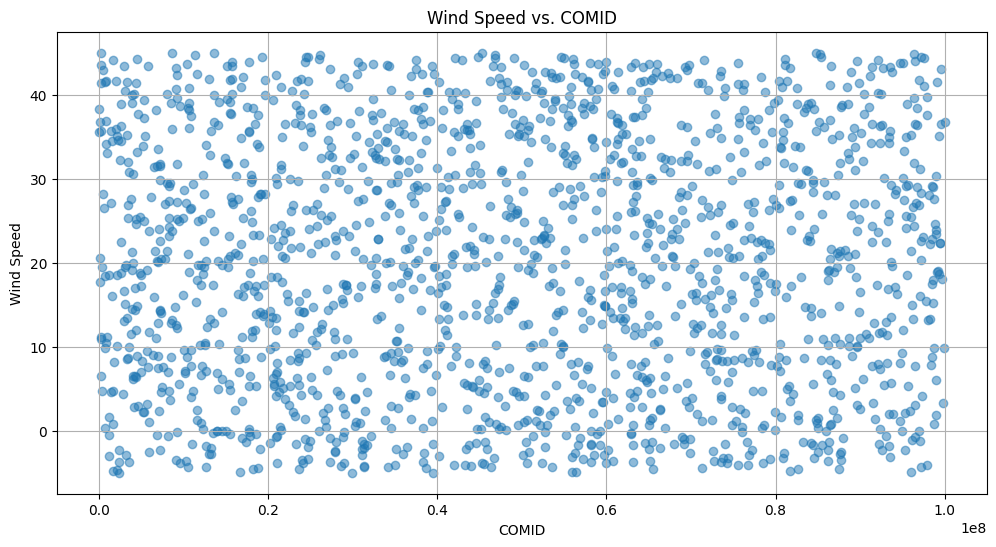

In [15]:
#Scatter Plot of Wind Speed vs. COMID
plt.figure(figsize=(12, 6))
plt.scatter(merged_obs['COMID'], merged_obs['Wind speed'], alpha=0.5)
plt.title('Wind Speed vs. COMID')
plt.xlabel('COMID')
plt.ylabel('Wind Speed')
plt.grid(True)
plt.show()

Map Visualization of Wind Speed
A map to show the geographical distribution of wind speeds
Each point on the map represents a station, and the color indicates the wind speed

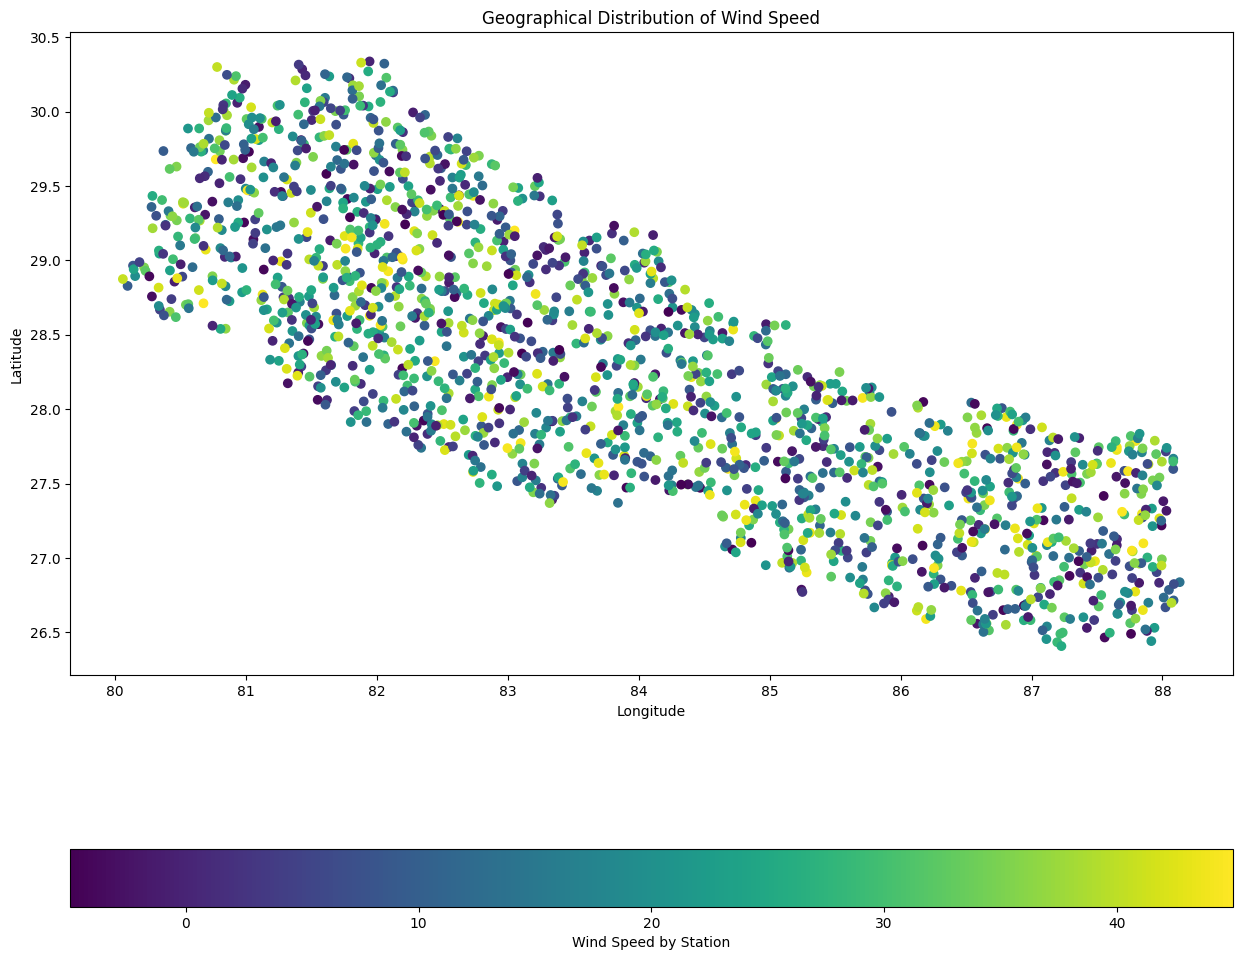

In [16]:
#Map Visualization of Wind Speed
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
merged_obs.plot(column='Wind speed', ax=ax, legend=True,
                legend_kwds={'label': "Wind Speed by Station",
                             'orientation': "horizontal"})
plt.title('Geographical Distribution of Wind Speed')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# **Result**
The result is a shapefile named 'Merged_Observation_Points.shp'.

# **Conclusion**

This document provides a detailed procedure of how I merged wind speed data into a shapefile using Python in Jupyter Notebook. 